In [6]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import model
from utils import lfw_dataset_handler as lfw
from train import load_checkpoint
import paths_config as paths
import os

In [16]:
def visualize_results(model, test_loader, device, num_images=5):
    """
    Visualización de Resultados
    ==========================
    
    Muestra comparación entre:
    - Imágenes originales
    - Sus reconstrucciones por el autoencoder
    
    Esto permite evaluar visualmente:
    1. Calidad de la reconstrucción
    2. Qué características preserva mejor el modelo
    3. Qué tipos de artefactos o distorsiones introduce
    """
    model.eval()
    
    with torch.no_grad():
        # Obtener un batch de imágenes
        batch, _ = next(iter(test_loader))
        batch = batch.to(device)
        outputs = model(batch)
        
        n = min(num_images, batch.size(0))
        
        plt.figure(figsize=(12, 4))
        for i in range(n):
            # Original
            plt.subplot(2, n, i + 1)
            plt.imshow(batch[i].cpu().permute(1, 2, 0))
            plt.axis('off')
            if i == 0:
                plt.title('Original')
            
            # Reconstrucción
            plt.subplot(2, n, i + n + 1)
            plt.imshow(outputs[i].cpu().permute(1, 2, 0))
            plt.axis('off')
            if i == 0:
                plt.title('Reconstruida')
        
        plt.tight_layout()
        plt.show()


Dataset lfw encontrado en disco.
Device: cuda


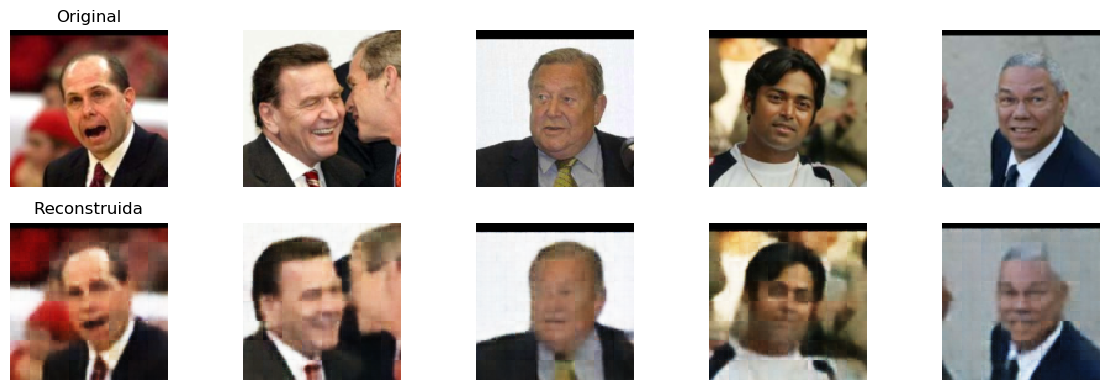

In [17]:
# Load the best model checkpoint
model_path = '/home/eric/ml2/src/Autoencoder/out/checkpoints/best_model.pth'
best_model = torch.load(model_path, weights_only=True)

# Load the dataset
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

_, _, test_loader = lfw.get_data_loaders(
    batch_size=32,
    base_dir=paths.BASE_DATA_DIR,
    download=False,
    transform=transform
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

# Crear y cargar el modelo
autoencoder = model.ConvAutoencoder().to(device)
autoencoder.load_state_dict(best_model['model_state_dict'])  # Aquí está el cambio


# Visualizar resultados
visualize_results(autoencoder, test_loader, device, num_images=5)